# Injector Optimization with NN Prior at LCLS
Aiming to optimize transverse beam size with solenoid SQ, CQ and 6 Quads

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../")
    sys.path.append("../")

run_dir = "/home/physics/ml_tuning/20230821_LCLS_Injector/"
print(sys.path)

['/home/physics/rroussel/SLAC_Xopt/lcls/nn_prior', '/usr/local/lcls/tools/python/toolbox', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python39.zip', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python3.9', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python3.9/lib-dynload', '', '/usr/local/lcls/package/anaconda/envs/python3.9envs/rhel7/nightly/08-21-2023/lib/python3.9/site-packages', '../../', '../']


## Set up image diagnostic

In [2]:
from scripts.image import ImageDiagnostic
import yaml

fname = "../OTR3_config.yml"
image_diagnostic = ImageDiagnostic.parse_obj(yaml.safe_load(open(fname)))
image_diagnostic.save_image_location = run_dir
image_diagnostic.n_fitting_restarts = 2
image_diagnostic.visualize = False
image_diagnostic.background_file = run_dir + "OTRS_IN20_621_background.npy"
print(image_diagnostic.yaml())

{screen_name: 'OTRS:IN20:621', array_data_suffix: IMAGE, array_n_cols_suffix: ROI_XNP,
  array_n_rows_suffix: ROI_YNP, resolution_suffix: RESOLUTION, beam_shutter_pv: 'IOC:BSY0:MP01:MSHUTCTL',
  background_file: /home/physics/ml_tuning/20230821_LCLS_Injector/OTRS_IN20_621_background.npy,
  save_image_location: /home/physics/ml_tuning/20230821_LCLS_Injector/, roi: null,
  min_log_intensity: 4.0, bounding_box_half_width: 3.0, wait_time: 0.1, n_fitting_restarts: 2,
  visualize: false, testing: false}



In [3]:
#image_diagnostic.measure_background(file_location=run_dir)

In [4]:
image_diagnostic.background_file

'/home/physics/ml_tuning/20230821_LCLS_Injector/OTRS_IN20_621_background.npy'

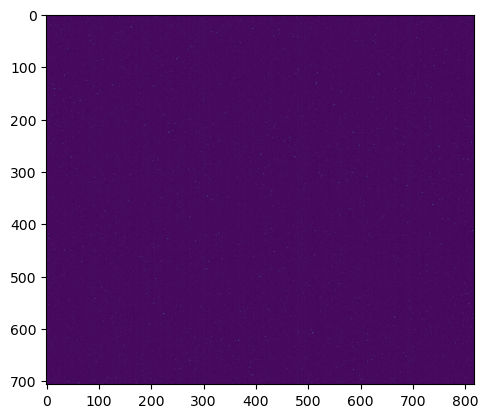

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image_diagnostic.background_image)

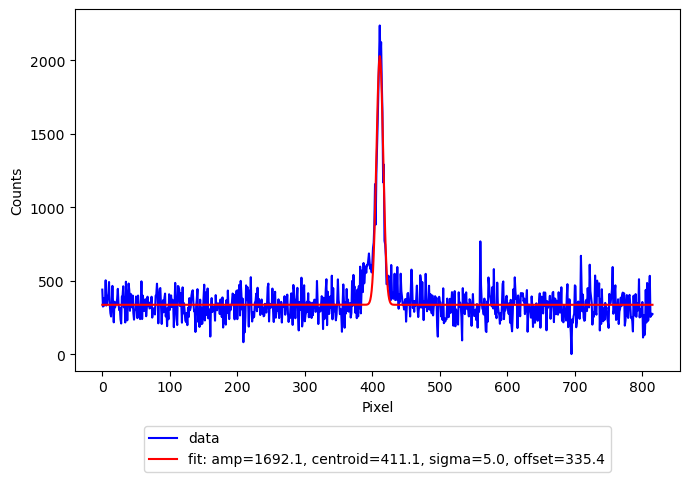

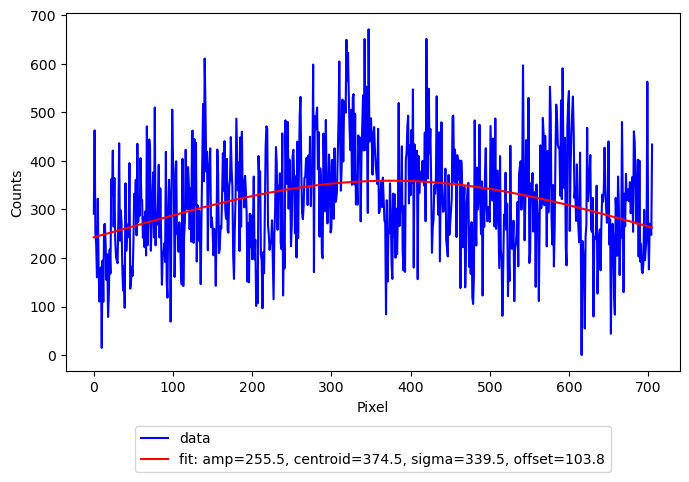

{'Cx': nan,
 'Cy': nan,
 'Sx': nan,
 'Sy': nan,
 'bb_penalty': 701.6374159988884,
 'total_intensity': 1177985.7999999998,
 'log10_total_intensity': 6.0711400552908}

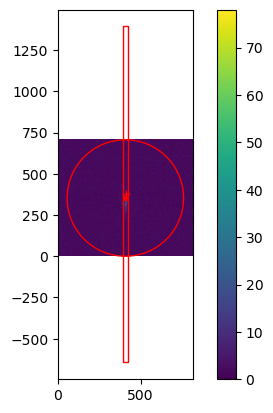

In [6]:
image_diagnostic.test_measurement()

In [7]:
import pandas as pd
filename = "../variables.csv"
VARIABLE_RANGES = pd.read_csv(filename, index_col=0, header=None).T.to_dict(orient='list')

In [8]:
# replace w turbo ranges
VARIABLE_RANGES = {"QUAD:IN20:121:BCTRL": [-0.010216134865221826, 0.0004946549130899012],
"QUAD:IN20:122:BCTRL": [-0.0037497838633867926, 0.0046256696462631235],
"QUAD:IN20:361:BCTRL": [-3.566282173921773, -2.952950549721718],
"QUAD:IN20:371:BCTRL": [2.1990287090002765, 2.942573140353014],
"QUAD:IN20:425:BCTRL": [-1.8677221410349012, -1.08],
"QUAD:IN20:441:BCTRL": [-1.08, 0.3188352971091497],
"QUAD:IN20:511:BCTRL": [2.5533611167764256, 4.642105910740238],
"QUAD:IN20:525:BCTRL": [-4.004095742514585, -2.429185827568884],
"SOLN:IN20:121:BCTRL": [0.4603330888274317, 0.4898202648048277]}

In [9]:
VARIABLE_RANGES

{'QUAD:IN20:121:BCTRL': [-0.010216134865221826, 0.0004946549130899012],
 'QUAD:IN20:122:BCTRL': [-0.0037497838633867926, 0.0046256696462631235],
 'QUAD:IN20:361:BCTRL': [-3.566282173921773, -2.952950549721718],
 'QUAD:IN20:371:BCTRL': [2.1990287090002765, 2.942573140353014],
 'QUAD:IN20:425:BCTRL': [-1.8677221410349012, -1.08],
 'QUAD:IN20:441:BCTRL': [-1.08, 0.3188352971091497],
 'QUAD:IN20:511:BCTRL': [2.5533611167764256, 4.642105910740238],
 'QUAD:IN20:525:BCTRL': [-4.004095742514585, -2.429185827568884],
 'SOLN:IN20:121:BCTRL': [0.4603330888274317, 0.4898202648048277]}

In [10]:
IMAGE_CONSTRAINTS = {
            "bb_penalty": ["LESS_THAN", 0.0],
            "log10_total_intensity": ["GREATER_THAN", image_diagnostic.min_log_intensity]
        }

from xopt import VOCS
VARIABLES = ["SOLN:IN20:121:BCTRL", "QUAD:IN20:121:BCTRL","QUAD:IN20:122:BCTRL",'QUAD:IN20:361:BCTRL','QUAD:IN20:371:BCTRL','QUAD:IN20:425:BCTRL','QUAD:IN20:441:BCTRL','QUAD:IN20:511:BCTRL','QUAD:IN20:525:BCTRL']
vocs = VOCS(
        variables = {ele: VARIABLE_RANGES[ele] for ele in VARIABLES},
        #constraints = IMAGE_CONSTRAINTS,
        objectives = {"total_size": "MINIMIZE"},
    )
print(vocs)

variables={'SOLN:IN20:121:BCTRL': [0.4603330888274317, 0.4898202648048277], 'QUAD:IN20:121:BCTRL': [-0.010216134865221826, 0.0004946549130899012], 'QUAD:IN20:122:BCTRL': [-0.0037497838633867926, 0.0046256696462631235], 'QUAD:IN20:361:BCTRL': [-3.566282173921773, -2.952950549721718], 'QUAD:IN20:371:BCTRL': [2.1990287090002765, 2.942573140353014], 'QUAD:IN20:425:BCTRL': [-1.8677221410349012, -1.08], 'QUAD:IN20:441:BCTRL': [-1.08, 0.3188352971091497], 'QUAD:IN20:511:BCTRL': [2.5533611167764256, 4.642105910740238], 'QUAD:IN20:525:BCTRL': [-4.004095742514585, -2.429185827568884]} constraints={} objectives={'total_size': 'MINIMIZE'} constants={} observables=[]


In [11]:
from epics import caput, caget_many
from time import sleep
import numpy as np
def eval_beamsize(inputs):
    global image_diagnostic
    # set PVs
    for k, v in inputs.items():
        print(f'CAPUT {k} {v}')
        caput(k, v)

    sleep(2.0)

    # get beam sizes from image diagnostic
    metadata = inputs
    results = image_diagnostic.measure_beamsize(1, **metadata)
    results["S_x_mm"] = np.array(results["Sx"]) * 1e-3
    results["S_y_mm"] = np.array(results["Sy"]) * 1e-3

    # get other PV's NOTE: Measurements not synchronous with beamsize measurements!
    results = results

    # add total beam size
    results["total_size"] = np.sqrt(np.array(results["Sx"]) ** 2 + np.array(results["Sy"]) ** 2)
    # results["total_size"] = np.sqrt(np.abs(np.array(results["Sx"])) * np.array(results["Sy"]))
    return results

## Define NN prior

In [12]:
import torch

from lume_model.utils import variables_from_yaml
from lume_model.torch import LUMEModule, PyTorchModel

In [13]:
model_path = "lcls_cu_injector_nn_model/"

# # load nn_to_cal transformers
# reg = "low"  # "low" or "high"
# input_nn_to_cal = torch.load(f"calibration/input_nn_to_cal_{reg}_reg.pt")
# output_nn_to_cal = torch.load(f"calibration/output_nn_to_cal_{reg}_reg.pt")

# load sim_to_nn transformers
input_sim_to_nn = torch.load(model_path + "model/input_sim_to_nn.pt")
output_sim_to_nn = torch.load(model_path + "model/output_sim_to_nn.pt")

# load pv_to_sim transformers
input_pv_to_sim = torch.load(model_path + "model/input_pv_to_sim.pt")
output_pv_to_sim = torch.load(model_path + "model/output_pv_to_sim.pt")

# load in- and output variable specification
input_variables, output_variables = variables_from_yaml(open(model_path + "model/pv_variables.yml"))
# input_variables, output_variables = variables_from_yaml(open(f"calibration/pv_variables_{reg}_reg.yml"))

# replace keys in input variables
input_variables = {name.replace("BACT", "BCTRL"): ele for name, ele in input_variables.items()}

# create LUME-model
lume_model = PyTorchModel(
    model_file=model_path + "model/model.pt",
    input_variables=input_variables,
    output_variables=output_variables,
    input_transformers=[input_pv_to_sim, input_sim_to_nn],
    output_transformers=[output_sim_to_nn, output_pv_to_sim],
    # input_transformers=[input_pv_to_sim, input_sim_to_nn, input_nn_to_cal],
    # output_transformers=[output_nn_to_cal, output_sim_to_nn, output_pv_to_sim],
)

# wrap in LUMEModule
lume_module = LUMEModule(
    model=lume_model,
    feature_order=vocs.variable_names,
    output_order=lume_model.outputs[0:2],
)

# define objective model
class ObjectiveModel(torch.nn.Module):
    def __init__(self, model: LUMEModule):
        super(ObjectiveModel, self).__init__()
        self.model = model

    @staticmethod
    def function(sigma_x: torch.Tensor, sigma_y: torch.Tensor) -> torch.Tensor:
        # using this calculation due to occasional negative values
        return torch.sqrt(sigma_x ** 2 + sigma_y ** 2)

    def forward(self, x) -> torch.Tensor:
        res = torch.zeros(x.shape[:-1])
        #idx_sigma_x = self.model.output_order.index("OTRS:IN20:571:XRMS")
        #idx_sigma_y = self.model.output_order.index("OTRS:IN20:571:YRMS")
        #sigma_x = self.model(x)[..., idx_sigma_x]
        #sigma_y = self.model(x)[..., idx_sigma_y]
        #res = self.function(sigma_x, sigma_y)
        #print(x.shape)
        #print(res.shape)
        return res

objective_model = ObjectiveModel(lume_module)

print(lume_module.feature_order)
print(lume_module.output_order)

['QUAD:IN20:121:BCTRL', 'QUAD:IN20:122:BCTRL', 'QUAD:IN20:361:BCTRL', 'QUAD:IN20:371:BCTRL', 'QUAD:IN20:425:BCTRL', 'QUAD:IN20:441:BCTRL', 'QUAD:IN20:511:BCTRL', 'QUAD:IN20:525:BCTRL', 'SOLN:IN20:121:BCTRL']
['OTRS:IN20:571:XRMS', 'OTRS:IN20:571:YRMS']


In [14]:
# Xopt evaluator function
def evaluate(input_dict):
    model_result = lume_model.evaluate(input_dict)
    sigma_xy = objective_model.function(model_result["OTRS:IN20:571:XRMS"], model_result["OTRS:IN20:571:YRMS"])
    return {vocs.objective_names[0]: sigma_xy.detach().item()}

## Run Xopt

In [15]:
from xopt import Xopt, VOCS
from xopt.evaluator import Evaluator
from xopt.numerical_optimizer import LBFGSOptimizer
from xopt.generators import UpperConfidenceBoundGenerator
from xopt.generators.bayesian.models.standard import StandardModelConstructor

class FixedPrior(torch.nn.Module):
    def forward(self, X):
        return torch.zeros(X.shape[:-1])
        
from gpytorch.means import ConstantMean


# remember to set use low noise prior to false!!!
model_constructor = StandardModelConstructor(
    use_low_noise_prior=False,
    mean_modules={"total_size": ConstantMean()},
)
generator = UpperConfidenceBoundGenerator(
    vocs=vocs,
    model_constructor=model_constructor,
    # turbo_controller="optimize"
)
generator.numerical_optimizer.max_iter = 200
evaluator = Evaluator(function=evaluate)
X = Xopt(generator=generator, evaluator=evaluator, vocs=vocs)
#X.options.dump_file = run_dir + "nn_optimization_3.yml"
X


            Xopt
________________________________
Version: 2.0a1+74.g9067c79
Data size: 0
Config as YAML:
xopt: {asynch: false, strict: true, dump_file: null, max_evaluations: null}
generator:
  name: upper_confidence_bound
  model: null
  turbo_controller: null
  use_cuda: false
  model_constructor:
    name: standard
    use_low_noise_prior: false
    covar_modules: {}
    mean_modules: {}
    trainable_mean_keys: []
  numerical_optimizer: {name: LBFGS, n_raw_samples: 20, n_restarts: 20, max_iter: 200}
  max_travel_distances: null
  fixed_features: null
  computation_time: {}
  n_candidates: 1
  n_monte_carlo_samples: 128
  beta: 2.0
evaluator:
  function: __main__.evaluate
  max_workers: 1
  function_kwargs: {}
  vectorized: false
vocs:
  variables:
    SOLN:IN20:121:BCTRL: [0.4603330888274317, 0.4898202648048277]
    QUAD:IN20:121:BCTRL: [-0.010216134865221826, 0.0004946549130899012]
    QUAD:IN20:122:BCTRL: [-0.0037497838633867926, 0.0046256696462631235]
    QUAD:IN20:361:BCTRL: 

In [16]:
import pandas as pd

default = {'SOLN:IN20:121:BCTRL': 0.474877290758955,
 'QUAD:IN20:121:BCTRL': -0.0048398437,
 'QUAD:IN20:122:BCTRL': 0.0018,
 'QUAD:IN20:361:BCTRL': -3.16,
 'QUAD:IN20:371:BCTRL': 2.5352702,
 'QUAD:IN20:425:BCTRL': -1.1,
 'QUAD:IN20:441:BCTRL': -0.8118599,
 'QUAD:IN20:511:BCTRL': 3.6494056,
 'QUAD:IN20:525:BCTRL': -3.2522187,
}

X.evaluate_data(pd.DataFrame(default, index=[0]))
#X.random_evaluate(20)

,SOLN:IN20:121:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,total_size,xopt_runtime,xopt_error
1,0.474877,-0.00484,0.0018,-3.16,2.53527,-1.1,-0.81186,3.649406,-3.252219,291.888844,0.002129,False


In [17]:
X.data

,SOLN:IN20:121:BCTRL,QUAD:IN20:121:BCTRL,QUAD:IN20:122:BCTRL,QUAD:IN20:361:BCTRL,QUAD:IN20:371:BCTRL,QUAD:IN20:425:BCTRL,QUAD:IN20:441:BCTRL,QUAD:IN20:511:BCTRL,QUAD:IN20:525:BCTRL,total_size,xopt_runtime,xopt_error
1,0.474877,-0.00484,0.0018,-3.16,2.53527,-1.1,-0.81186,3.649406,-3.252219,291.888844,0.002129,False


In [25]:
for i in range(100):
    print(i)
    X.step()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyboardInterrupt: 

<Axes: >

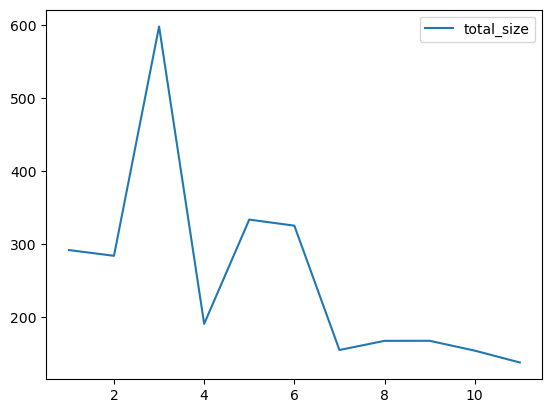

In [19]:
X.data.plot(y="total_size")

<Axes: >

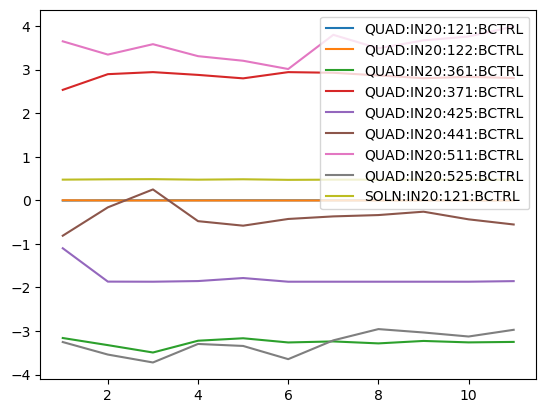

In [20]:
X.data.plot(y=X.vocs.variable_names)

In [21]:
X.data.head()["total_size"].mean()

339.7046721924927

In [22]:
X.data.tail()["total_size"].mean()

156.40841333816755

In [23]:
X.data["total_size"].min()

137.87056671233722

In [24]:
from scripts.utils.read_files import read_file
res = read_file(X.data.iloc[10]["save_filename"])

KeyError: 'save_filename'

In [ ]:
plt.imshow(res["images"][0])

In [ ]:
res

In [ ]:
X.generator.computation_time